# 📘 Machine Learning 2025/2026  

# Laboratorio 7 — 🌳 Decision Trees
### Docenti: Danilo Croce, Giorgio Gambosi  

In questo notebook costruiremo da zero una pipeline completa per **comprendere, addestrare e visualizzare** un *Decision Tree Classifier*.

L’obiettivo non è solo “farlo funzionare”, ma capire perché funziona e come prendere decisioni corrette nella pratica.

---

# 🎯 Obiettivi del notebook

1. **Capire come funziona un Decision Tree**  
   – struttura ad albero  
   – nodi di split  
   – impurità  
   – criteri di scelta dello split  

2. **Implementare il framework pratico del machine learning**  
   – download di *Iris*  
   – shuffle  
   – split 80% / 10% / 10%

3. **Addestrare un Decision Tree con scikit-learn**

4. **Visualizzare e interpretare l’albero**

5. **Comprendere gli indici di impurità**  
   – Gini  
   – Entropia  
   – Misclassification Error  
   – perché questi criteri portano a scelte diverse

---

# 🌳 1. Decision Trees: Idee di base

Un decision tree è un modello predittivo che ripetutamente:

1. **divide i dati** in base ai valori di una feature  
2. **crea nodi** che rappresentano domande binarie (o multi-split)  
3. **raggiunge foglie** che contengono una predizione (classe o valore)

Esempio:  
> *“Petal length < 2.45?”*  
> – sì → classe *setosa*  
> – no → continua a dividere

Un albero è quindi una sequenza di **decisioni gerarchiche**, con lo scopo di creare regioni dello spazio dei dati che siano **pure**, cioè che contengano quasi solo una classe.

## 🌳 1.1 Le tre famiglie di algoritmi: CART, ID3 e C4.5  
Prima di vedere il funzionamento degli split, è utile conoscere rapidamente le tre principali famiglie storiche di algoritmi che costruiscono alberi decisionali.

### 🔴 CART (Classification and Regression Trees)  
Proposto da Leo Breiman et al. nel 1984.  
Caratteristiche principali:  
- supporta **classificazione e regressione**  
- costruisce **solo split binari**  
- criterio di impurità tipico: **Gini** (classificazione) o **MSE** (regressione)  
- efficiente, stabile e alla base di molte implementazioni moderne  
È lo standard pratico, ad es. in scikit‑learn.

---

### 🔵 ID3 (Iterative Dichotomiser 3)  
Sviluppato da Ross Quinlan nel 1986.  
Caratteristiche principali:  
- usa **entropia / information gain** come criterio di split  
- lavora bene con feature **categoriche**  
- originariamente non gestiva bene feature continue o valori mancanti  
- tende a costruire alberi profondi senza pruning automatico

---

### 🟢 C4.5  
Evoluzione di ID3, uscita nel 1993 e sempre di Quinlan.  
Caratteristiche chiave:  
- gestisce anche **feature continue**, trovando soglie ottimali  
- introduce il **Gain Ratio**, che normalizza l’information gain  
- supporta **valori mancanti**  
- incorpora una strategia di **pruning** per evitare l’overfitting  
- produce facilmente regole “if-then” oltre all’albero

---

### Riassunto cronologico e comparativo

| Algoritmo | Anno | Criterio | Tipo split | Caratteristiche principali |
|-----------|------|----------|------------|----------------------------|
| **CART**  | 1984 | Gini/MSE | binari      | classificazione + regressione, molto usato |
| **ID3**   | 1986 | Entropia | multi-valore| orientato a dati categorici, senza pruning |
| **C4.5**  | 1993 | Gain Ratio | multi-valore| gestisce continui, pruning, valori mancanti |

Così l’evoluzione storica è chiara: dall’approccio generale di CART, alla formulazione di ID3 per classificazione pura con entropia, fino ai miglioramenti di C4.5 per rendere gli alberi più robusti e applicabili a scenari reali.

---

# 🧠 2. Algoritmo Greedy: ID3 / CART (versione concettuale)

I moderni alberi di classificazione (CART) funzionano così:


# Pseudocodice dell’algoritmo CART per decision tree (classificazione)

L’algoritmo CART costruisce un albero di decisione scegliendo, a ogni nodo, la split che massimizza la purezza dei sottoinsiemi figli.

---

## 🎯 Obiettivo
Costruire un albero binario che minimizzi un criterio di impurità (Gini, entropia o misclassification error).

---

## 🔗 Pseudocodice

**FUNCTION** `BuildTree(dataset D, depth)`  
1. **Se** D è puro (tutti della stessa classe) **o** depth = max_depth **o** $|D| < \text{min\_samples\_split}$:  
    **return** `Leaf(label = majority_class(D))`

2. Per ogni feature $f$  
   Per ogni possibile valore di split $s$  
    - Dividi D in due insiemi:  
     $D_{\text{left}} = \{ x \in D : x[f] \le s \}$  
     $D_{\text{right}} = \{ x \in D : x[f] > s \}$  
    - Calcola l’impurità dei figli:  
     $I_{\text{split}} = \frac{|D_L|}{|D|} I(D_L) + \frac{|D_R|}{|D|} I(D_R)$  
    - Tieni traccia della split con **impurità minima**

3. Sia $(f^*, s^*)$ la migliore split trovata  
4. Crea nodo interno con split $(f^*, s^*)$

5. `left_child = BuildTree(D_left^*, depth+1)`  
6. `right_child = BuildTree(D_right^*, depth+1)`

7. **return** nodo con figli left/right



Caratteristiche importanti:
- è un algoritmo **greedy**  
- non guarda lo split futuro, solo quello attuale  
- cerca lo split che **massimizza la purezza delle foglie**

---

# 📉 3. Perché servono misure di impurità?

Se ogni split servisse solo a "dividere", l’albero sarebbe arbitrario.  
Abbiamo bisogno di una **funzione obiettivo** che misura quanto un nodo è “pulito”.

Una foglia è perfettamente pura quando contiene campioni di una sola classe.

Gli indici standard che studieremo sono:

1. **Gini Impurity** (default in CART)
2. **Entropia** (usata in ID3 / C4.5)
3. **Classification Error** (più grezzo)

Discuteremo dopo le differenze teoriche e pratiche.

---

> Ora possiamo passare alla parte pratica:
> **download del dataset Iris, shuffle e split 80/10/10**.


# 📥 4. Caricamento del Dataset Iris, Shuffle e Split 80/10/10

Il dataset *Iris* è uno dei dataset più utilizzati in machine learning:  
- 150 esempi  
- 4 feature continue  
- 3 classi bilanciate  
- nessun valore mancante  

Perfetto per studiare algoritmi e visualizzare modelli.

---

## 🔄 4.1 Caricamento del dataset

Useremo `sklearn.datasets.load_iris`, che restituisce:
- una matrice di feature `X ∈ ℝ^{150×4}`
- un vettore target `y ∈ {0,1,2}`

---

## 🔀 4.2 Shuffle dei dati

Anche se il dataset è già ben mescolato, **in ML non si dà mai per scontato**:

- garantiamo che i dati siano in ordine casuale  
- evitiamo pattern non desiderati (ad esempio, classi raggruppate)

Il mescolamento deve essere **riproducibile**, quindi useremo un `random_state`.

---

## ✂️ 4.3 Split 80% / 10% / 10%

Realizziamo la classica divisione:

- **80% train** → per addestrare il modello  
- **10% validation** → per scegliere iperparametri  
- **10% test** → per valutazione finale  

Scikit-learn non offre direttamente uno split a tre vie, quindi lo faremo in due step:

1. split train+val vs test  
2. split train vs validation  

---

### 📌 Risultati attesi dopo questo blocco

Dovremmo ottenere:

| Set | Dimensione (circa) | Uso |
|-----|---------------------|------|
| **Train** | 120 esempi | training del modello |
| **Validation** | 15 esempi | tuning di iperparametri / stopping |
| **Test** | 15 esempi | valutazione finale e onesta |

Una volta preparati i dati possiamo procedere all’**addestramento del Decision Tree**.

Train: (120, 4)
Val  : (15, 4)
Test : (15, 4)

Accuracy Validation: 1.0
Accuracy Test      : 0.9333333333333333


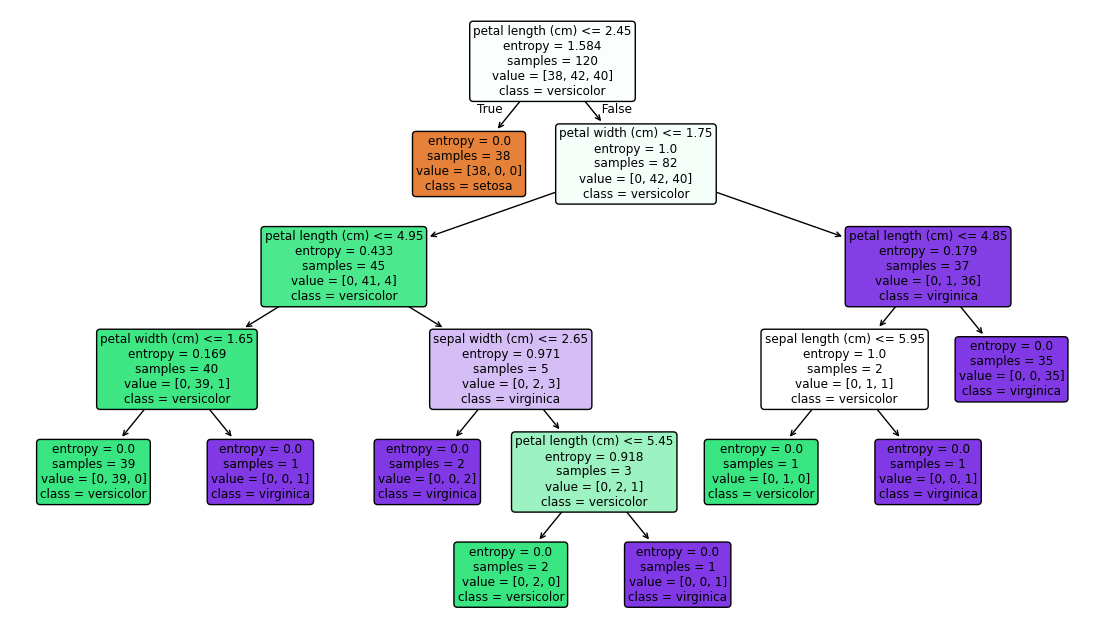

In [ ]:
# ------------------------------------------------------------
# Decision Tree con scikit-learn
# ------------------------------------------------------------
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1) Caricamento e suddivisione del dataset
# ------------------------------------------------------------
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# shuffle + split 80 / 10 / 10
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, shuffle=True, random_state=23
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, shuffle=True, random_state=23
)

print("Train:", X_train.shape)
print("Val  :", X_val.shape)
print("Test :", X_test.shape)

# ------------------------------------------------------------
# 2) Addestramento del Decision Tree
# ------------------------------------------------------------
dt = DecisionTreeClassifier(
    criterion="entropy",        # alternative: "gini" (default), "log_loss"
    max_depth=None,          # nessun limite per ora (attenzione all'overfitting)
    min_samples_split=2,
    random_state=42
)

dt.fit(X_train, y_train)

# ------------------------------------------------------------
# 3) Valutazione su validation e test set
# ------------------------------------------------------------
val_pred = dt.predict(X_val)
test_pred = dt.predict(X_test)

acc_val = accuracy_score(y_val, val_pred)
acc_test = accuracy_score(y_test, test_pred)

print("\nAccuracy Validation:", acc_val)
print("Accuracy Test      :", acc_test)

# ------------------------------------------------------------
# 4) Visualizzazione dell'albero
# ------------------------------------------------------------
plt.figure(figsize=(14, 8))
plot_tree(
    dt,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True
)
plt.show()

# 📉 5. Indici di Impurità nei Decision Trees

Quando un albero decide **qual è la migliore split**, deve valutare quanto i nodi figli siano *puri*, cioè quanto contengano una sola classe.

Per questo si usano **indici di impurità**: funzioni che misurano quanto un insieme di esempi è “mescolato”.

Sia $p_k$ la proporzione di esempi della classe $k$ in un nodo.

---

## 1️⃣ Misclassification Error

L’indice più semplice.

$$
\text{Error} = 1 - \max_k p_k
$$

- vale 0 quando una classe domina completamente  
- misura solo “quanto spesso sbaglierei predicendo la classe maggioritaria”

**Pro:** semplice da interpretare  
**Contro:** poco sensibile a cambiamenti nella distribuzione delle classi

---

## 2️⃣ Gini Impurity (default in CART)

$$
\text{Gini} = \sum_k p_k (1 - p_k)
$$

Interpretazione intuitiva:  
probabilità che due esempi presi a caso appartengano a classi diverse.

**Pro:**  
- più sensibile di misclassification  
- semplice e veloce da calcolare  
- spesso simile all’entropia nella pratica

**Contro:**  
- interpretazione più “meccanica”

---

## 3️⃣ Entropia (criterio di ID3 / C4.5)

$$
\text{Entropy} = -\sum_k p_k \log p_k
$$

Deriva dalla teoria dell’informazione: misura l’incertezza nel nodo.

**Pro:**  
- ottima interpretazione teorica  
- molto sensibile alle variazioni di distribuzione

**Contro:**  
- più costosa da calcolare (logaritmi)

---

# 🔬 Differenze pratiche

Nella pratica:

- **Gini** e **Entropia** producono spesso alberi simili  
- **Gini** è leggermente più veloce → default in CART  
- **Entropia** è più interpretabile  
- **Misclassification** è troppo grezzo per costruire l’albero  
  (ma utile nel pruning)

---

# 👍 Quale criterio scegliere?

| Obiettivo | Criterio consigliato |
|----------|-----------------------|
| Velocità | Gini |
| Interpretazione teorica | Entropia |
| Albero piccolo, pruning | Misclassification Error |
| Standard didattico | Entropia |
| Standard industriale | Gini |



# 🌳 Vantaggi e Limiti dei Decision Tree

I Decision Tree sono uno dei modelli più utilizzati nel machine learning classico.  
Sono potenti, flessibili e soprattutto **interpretabilissimi**.  
Ma hanno anche debolezze strutturali che spesso richiedono modelli ensemble come **Random Forest** o **Gradient Boosting** (vedi prossime lezioni).

---

# ✅ Vantaggi principali

## 1. **Interpretabilità immediata**
Ogni nodo dell’albero rappresenta una decisione semplice:

> *"Petal length < 2.45?"*

Il modello può essere:
- stampato  
- disegnato  
- tradotto in regole logiche  
- spiegato a un utente non tecnico

👉 È uno dei pochi modelli ML **veramente trasparenti**.

---

## 2. **Gestiscono bene feature miste**
I Decision Tree funzionano con:
- variabili numeriche  
- variabili categoriche  
- interazioni complesse tra feature  

e non richiedono alcuna normalizzazione.

---

## 3. **Modello non parametrico**
Non assume forme particolari (lineare, quadratica…) della relazione.  
L’albero si adatta automaticamente a decision boundary anche molto complessi.

---

# ❌ Limiti principali

## 1. **Instabilità (alta varianza)**
I Decision Tree sono estremamente sensibili ai piccoli cambiamenti nel dataset:

- aggiungi un esempio  
- rimuovi un esempio  
- cambia l’ordine  

→ l’albero può cambiare **completamente**, anche alla radice.

Questo avviene perché lo split scelto a un nodo influenza tutta la struttura sotto di esso.  
È il problema più grave degli alberi singoli.

---

## 2. **Rischio elevato di overfitting**
Se non limiti profondità o numero minimo di campioni:
- l’albero continua a dividere  
- isola casi specifici  
- crea regioni molto strette nel feature space  

👉 fa “memorization” invece di generalizzare.

---

## 3. **Decision boundary a gradini**
Il modello divide con soglie assiali:

- *feature 1 < soglia*  
- *feature 2 > soglia*  

Questo produce decision boundary a “scale di mattoni”, spesso troppo rigidi rispetto a modelli più flessibili.

---

## 4. **Preferenza per feature con molti valori**
Con criteri come Gini o Entropia, una feature con molti valori possibili tende ad apparire “molto informativa”, anche quando non lo è.

È una forma di bias strutturale (ID3/C4.5 introducono infatti il **Gain Ratio** per normalizzare questo effetto).

---

# ⭐ Spoiler: perché i Random Forest risolvono tutto questo?

I Random Forest nascono esattamente per eliminare i due difetti principali degli alberi singoli:

1. **Instabilità**  
   → l’ensemble di tanti alberi “media via” le oscillazioni

2. **Overfitting**  
   → ogni albero è addestrato su un sottoinsieme dei dati e delle feature  
   → la variabilità si riduce drasticamente  
   → il modello diventa robusto

In pratica:

- un singolo albero ha **bassa bias**, **alta varianza**  
- un Random Forest riporta la varianza sotto controllo

👉 Ecco perché, nella pratica, gli alberi “puri” sono soprattutto modelli didattici, mentre i Random Forest sono strumenti di lavoro.

---

# 📌 In sintesi

| Aspetto | Decision Tree | Random Forest |
|---------|----------------|----------------|
| Interpretabilità | ⭐⭐⭐⭐⭐ (ottima) | ⭐ (bassa) |
| Robustezza | ❌ instabile | ⭐⭐⭐⭐ |
| Overfitting | alto | basso |
| Performance media | discreta | ottima |
| Tempo di addestramento | molto rapido | più costoso |
| Uso industriale | raro da soli | diffusissimo |

Un albero è un ottimo strumento *per capire*.  
Un Random Forest è un ottimo strumento *per lavorare*.